In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from flatsurf import *
import os
import pwlf
import os
from surface_dynamics.all import *
from Library import *
from Library import Section
import math
from time import time
import copy
from scipy import integrate
import sympy as sym
from sympy import Symbol
from sympy import solve, lambdify
import traceback
import dill
import sys
import unittest
from surface_dynamics.all import Origami
from utils import load_arrays_from_file  # testing
from sage.all import matrix  # testing

In [3]:
# 7-0, 7-3, 7-7, 7-19, 7-29, 7-41
n_squares = 7
index = 0
j = 8
dx = 0.0005

In [3]:
permutations = perms_list(n_squares)
perm = permutations[index]

vec_file = "vecs" + str(n_squares) + "-" + str(index) + ".npy"
vecs0 = load_arrays_from_file(os.path.join("vecs", vec_file))

with open(os.path.join("results", f"{n_squares} - {index}", "setup.dill"), 'rb') as f:
    loaded_data = dill.load(f)
a,c,e,g = loaded_data

0
37198595
74427723
[[0.5]
 [1. ]]
i = 0 j = 8
top done: 495.21419620513916
side done: 493.1019027233124
diagonal done: 487.52864170074463


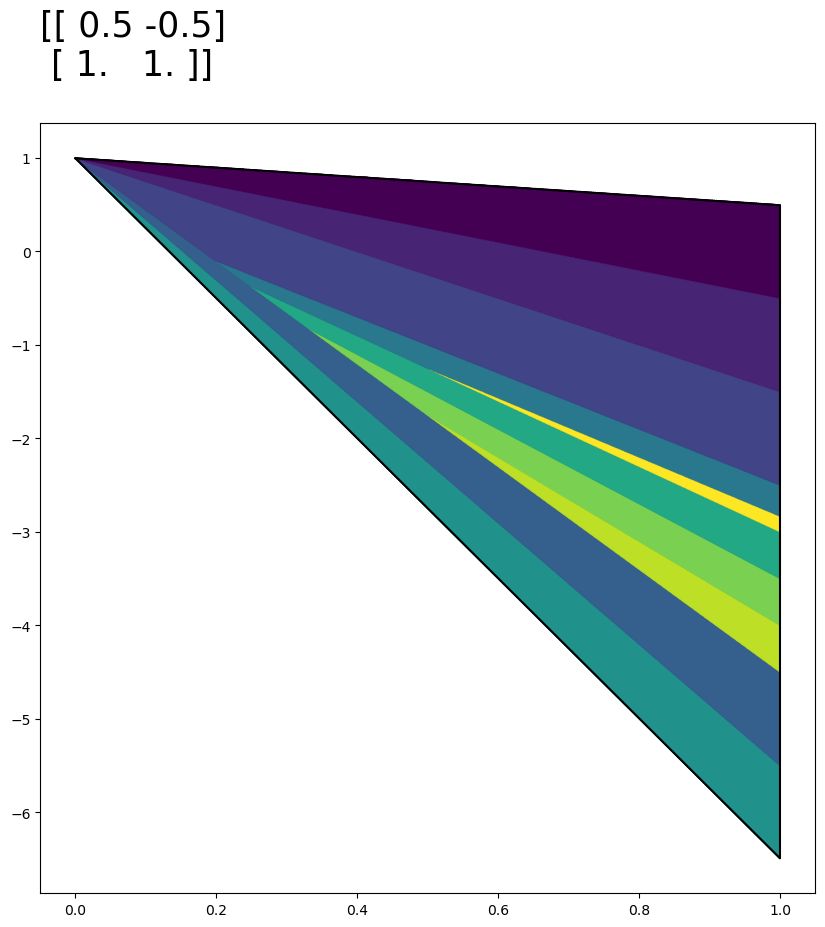

<Figure size 640x480 with 0 Axes>

In [7]:
i_list = [0,3,4,8,11,18]
i_list = [0]
for i in i_list:
    print(i)
    # get dimensions of section
    vecs, x_vals, m0, m1, x0, y0, dx_y, z = setup(
        a[i][j], np.round(c[i][j], decimals = 5), e[i][j], vecs0, dx, True)
    #print(z)
    print("i = " + str(i), "j = " + str(j))
    
    #if float(z) <= float(1/50000):
     #   print("too small")
      #  continue
    
    # create a dataframe with winning vector at certain points in the section
    df = winners1(vecs, x_vals, m0, m1, y0, dx, dx_y)
    
    # plot poincare section and save
    try:
        plot(df, vecs, c[i][j], j, n_squares, index, test=False)
    except Exception as error:
        print(error)
        continue
    df.to_csv(os.path.join(
        "results", f"{n_squares} - {index}", "df - " + str(j)), index=False)
    
    # make section object that define winning vector and line equations for boundaries of subsections
    sec_list = sec_setup(df, dx_y)
    secs = sec_comp(sec_list, dx)
    with open(os.path.join("results", f"{n_squares} - {index}", "secs - " + str(j) + ".dill"), 'wb') as f:
        dill.dump(secs, f)

length of inputs: 500, 500


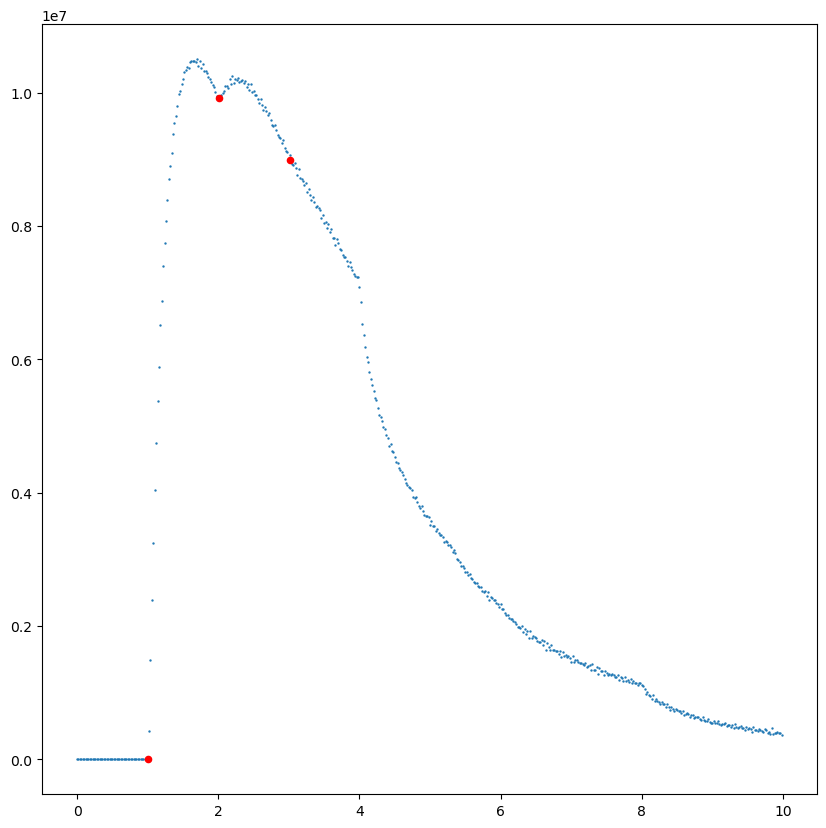

[0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,


<Figure size 640x480 with 0 Axes>

In [5]:
times = [1]
if True:
    times = time_comp(secs)

# plot the pdf for each cusp
pdf(list(df["time"]), times, dx*2, n_squares, index, j)

In [4]:
permutations = perms_list(n_squares)
perm = permutations[index]

vec_file = "vecs" + str(n_squares) + "-" + str(index) + ".npy"
vecs0 = load_arrays_from_file(os.path.join("vecs", vec_file))

with open(os.path.join("results", f"{n_squares} - {index}", "setup.dill"), 'rb') as f:
    loaded_data = dill.load(f)
a,c,e,g = loaded_data

df = read_df(n_squares, index, j)

with open(os.path.join("results", f"{n_squares} - {index}", f"secs - {j}.dill"), 'rb') as f:
    secs = dill.load(f)